# Técnicas Matemáticas para Big Data
## Project 01 Fuzzy Logic

GROUP G1:
- Student 1 - Nº 123153 - 33⅓% Work Participation
- Student 2 - Nº 123155 - 33⅓% Work Participation
- Student 3 - Nº 126784 - 33⅓% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]



Fuzzy logic is amongst the techniques that have emerged and been used in diverse practical control systems such as artificial intelligence, medicine, and economics, where stringent degrees of accuracy are not necessary, and a measure of uncertainty is required. This project seeks to portray the working principles and application of fuzzy logic within the domain of household electric power consumptions.

The energy consumption of households has never failed to attract attention, and in contemporary times it is regarded as an accelerating benefit together with energy saving and environmental preservation. Household energy consumption levels are dependent on several factors such as the weather (temperature and humidity), and the time of the day which are influenced by behavioral cycles. Being capable of understanding and predicting energy consumption load in a more accurate way leads to better forecast of energy supply requirements, its distribution and results in savings on the energy expenses. The role of this study is to simulate the energy usage of a household and show how certain external factors such as temperature, humidity, and time of the day contribute to variation in energy usage. Fuzzy logic is an appropriate tool as it helps capture the uncertainty and ambiguity that is associated with both human actions and the external environment.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]


The project employs the fuzzy logic approach to estimate the household energy consumption (`active_energy`) which is the consumption ‘active_energy’ of households by predicting interdependencies between temperature, and time of day. It is interesting to note that fuzzy logic is preferred because it enables the use of imprecise data for example “high temperature” or “evening” is real doesn’t have an exact definition and logic gives way to easiness by imprecision concept.

The dataset consists of weather and energy records at a closer level of detail based on temp (temperature) and hour (the time of day). The model specifies rules for how combinations of these fuzzy variables set with membership functions such as ‘temp’-low, moderate, high, affect the levels of active_energy. Before setting up the fuzzy logic rules;

- Extracted relevant columns for analysis, including humidity, temperature, and time.
- Fuzzified each variable into various classes.
- Concatenated the newly generated class columns for each variable of interest.


 This approach enabled us to design rules that better reflect real-world interactions between conditions like temperature fluctuations, daily routines, and household energy use patterns.



<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]


Several studies have demonstrated the effectiveness of fuzzy logic in energy prediction. For instance, researchers have applied fuzzy logic to model energy consumption based on weather parameters, finding it effective for interpreting the nonlinear and uncertain impacts of factors like temperature and humidity on energy demand. Other studies combine fuzzy logic with machine learning algorithms (like fuzzy neural networks) for even more complex predictions. The application in household energy consumption is particularly relevant as it enables a nuanced understanding of how fluctuating environmental conditions influence daily energy needs, making it valuable for energy conservation and smart home applications.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]


The main method used in this study is fuzzy logic, a rule-based approach that handles imprecise and vague data by transforming crisp inputs (like exact temperature or time) into fuzzy values (e.g., "moderate" temperature). Fuzzy logic systems consist of three main components: fuzzification, rule evaluation, and defuzzification.

1. **Data analysis**: This stage sets up the process of determining the input variables. In order to apply the rules, a preliniminary exploratory analysis will be. done within the variables to determine the variables most important and relevant to our output

1. **Fuzzification**: The model first converts crisp values for `temp` and `hour` into fuzzy sets based on predefined membership functions. For example, a temperature of 25°C might belong partially to "moderate" and "high" fuzzy sets, with membership degrees calculated using triangular functions
   
2. **Rule Evaluation**: The model applies a set of if-then rules to interpret how different fuzzy conditions should influence `active_energy`. For instance, rules might state: *If temperature is high and time is afternoon, then active energy is high*. These rules help capture the relationship between environmental factors and energy use patterns.

3. **Defuzzification**: Finally, the fuzzy results are converted back into a crisp output value (like a specific `active_energy` level) that can be compared with actual energy usage. The defuzzified output allows for an interpretable prediction that approximates household energy consumption based on the fuzzy conditions.

Fuzzy logic's flexibility and interpretability make it a suitable choice for modeling complex, uncertain relationships in energy consumption, especially where exact input-output relationships are challenging to define. This approach's main advantage is its ability to handle the ambiguity of real-world conditions, providing an intuitive, human-like way to model energy demand based on weather and time patterns.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [217]:
# %pip install seaborn
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math
    from meteostat import Point, Hourly
    from datetime import datetime
    from scipy.interpolate import interp1d
    from skfuzzy import control
except:
    %pip install -U pandas numpy matplotlib meteostat seaborn scipy scikit-fuzzy

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

The first dataset is electric power consumption data from a house with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available. The dataset has 2,075,259 rows and 9 columns. The dataset is available at: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [218]:
power_data = pd.read_csv('household_power_consumption.csv', delimiter=';', low_memory=False)
power_data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [219]:
# calculate 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
# parse numeric columns
power_data['Global_active_power'] = pd.to_numeric(power_data['Global_active_power'], errors='coerce')
power_data['Global_reactive_power'] = pd.to_numeric(power_data['Global_reactive_power'], errors='coerce')
power_data['Global_intensity'] = pd.to_numeric(power_data['Global_intensity'], errors='coerce')
power_data['Sub_metering_1'] = pd.to_numeric(power_data['Sub_metering_1'], errors='coerce')
power_data['Sub_metering_2'] = pd.to_numeric(power_data['Sub_metering_2'], errors='coerce')
power_data['Sub_metering_3'] = pd.to_numeric(power_data['Sub_metering_3'], errors='coerce')

power_data['active_energy'] = (power_data['Global_active_power']*1000/60 - power_data['Sub_metering_1'] - power_data['Sub_metering_2'] - power_data['Sub_metering_3'])


The second dataset is generated with meteostat library and additionaly script

```python
start = datetime(2006, 12, 16)
end = datetime(2010, 11, 26)
location = Point(48.77644, 2.29026, 75) #Sceaux, France
meteodata = Hourly(location, start, end)
meteodata = meteodata.fetch()
meteodata.to_csv('sceaux_hourly_temperatures.csv', sep=';')
```

In [220]:
meteo_data = pd.read_csv('sceaux_hourly_temperatures.csv', delimiter=';', low_memory=False)
meteo_data.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2006-12-16 00:00:00,6.0,3.0,81.0,NaN,NaN,210.0,14.8,NaN,1023.9,NaN,NaN
1,2006-12-16 01:00:00,5.3,2.6,83.0,0.0,NaN,200.0,7.6,NaN,1023.7,NaN,NaN
2,2006-12-16 02:00:00,4.9,2.4,84.0,0.0,NaN,200.0,11.2,NaN,1023.3,NaN,NaN
3,2006-12-16 03:00:00,4.0,2.0,87.0,NaN,NaN,170.0,11.2,NaN,1022.8,NaN,NaN
4,2006-12-16 04:00:00,4.2,2.7,90.0,0.0,NaN,200.0,14.8,NaN,1022.5,NaN,NaN


To merge this datasets into a single one, we will use the date and time columns. The datasets use different formats for the date and time columns, so we will need to convert them to a common format before merge.

In [221]:
power_data['timestamp'] = pd.to_datetime(power_data['Date'] + ' ' + power_data['Time'], format='%d/%m/%Y %H:%M:%S')
meteo_data['timestamp'] = pd.to_datetime(meteo_data['time'], format='%Y-%m-%d %H:%M:%S')
data_init = pd.merge(power_data, meteo_data, on='timestamp', how='inner')
data_init.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy,...,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,16/12/2006,18:00:00,2.790,0.180,237.520,11.8,0.0,0.0,18.0,28.500000,...,4.2,83.0,NaN,NaN,340.0,14.8,NaN,1026.8,NaN,NaN
1,16/12/2006,19:00:00,4.070,0.088,231.990,17.4,0.0,1.0,17.0,49.833333,...,3.7,83.0,0.0,NaN,340.0,14.8,NaN,1027.5,NaN,NaN
2,16/12/2006,20:00:00,3.206,0.078,232.430,13.8,0.0,0.0,16.0,37.433333,...,4.0,87.0,0.0,NaN,310.0,7.6,NaN,1028.0,NaN,NaN
3,16/12/2006,21:00:00,3.314,0.072,236.760,14.0,0.0,0.0,17.0,38.233333,...,3.8,88.0,NaN,NaN,310.0,7.6,NaN,1028.6,NaN,NaN
4,16/12/2006,22:00:00,3.464,0.170,236.030,14.6,0.0,1.0,17.0,39.733333,...,3.8,91.0,0.0,NaN,260.0,7.6,NaN,1028.9,NaN,NaN


Here there are many variables, but we will use only three ones: time, active power and temperature. The dataset has 34,567 rows.

#### variable explaination

- temp: The air temperature (°C)
- active_energy: An additional measure of energy that captures active energy used in the household.
- time: the time of the day

In [222]:
### lets extract our variable of interest

data=data_init.copy()[['timestamp','active_energy', 'temp','Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3' ]]

# Convert timestamp to datetime and then to time
data['timestamp_formatted'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M:%S').dt.time

# Convert times to minutes since midnight
data['time'] = data['timestamp'].apply(lambda t: (t.hour + t.minute / 60))
data['time_sin'] = np.sin(np.pi * data['time'] / 24)
data['time_cos'] = np.cos(np.pi * data['time'] / 24)

#normalize time_cos to abs values
data['time_cos_abs'] = np.abs(data['time_cos'])
data['time_sin_abs'] = np.abs(data['time_sin'])

data['time_cos_abs_inv'] = 1 - data['time_cos_abs']


data['active_energy_scaled'] = data['active_energy'] / data['active_energy'].max()

data.head()




,timestamp,active_energy,temp,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp_formatted,time,time_sin,time_cos,time_cos_abs,time_sin_abs,time_cos_abs_inv,active_energy_scaled
0,2006-12-16 18:00:00,28.500000,6.9,2.790,0.180,11.8,0.0,0.0,18.0,18:00:00,18.0,0.707107,-0.707107,0.707107,0.707107,0.292893,0.277147
1,2006-12-16 19:00:00,49.833333,6.4,4.070,0.088,17.4,0.0,1.0,17.0,19:00:00,19.0,0.608761,-0.793353,0.793353,0.608761,0.206647,0.484603
2,2006-12-16 20:00:00,37.433333,6.0,3.206,0.078,13.8,0.0,0.0,16.0,20:00:00,20.0,0.500000,-0.866025,0.866025,0.500000,0.133975,0.364019
3,2006-12-16 21:00:00,38.233333,5.6,3.314,0.072,14.0,0.0,0.0,17.0,21:00:00,21.0,0.382683,-0.923880,0.923880,0.382683,0.076120,0.371799
4,2006-12-16 22:00:00,39.733333,5.1,3.464,0.170,14.6,0.0,1.0,17.0,22:00:00,22.0,0.258819,-0.965926,0.965926,0.258819,0.034074,0.386386


In [223]:
# plot the historical data

#use first 100 data points
# data_sample = data.head(80)

# plt.figure(figsize=(14, 7))
# plt.plot(data_sample['timestamp'], data_sample['time_cos_abs'], label='time_cos')
# plt.plot(data_sample['timestamp'], data_sample['time_sin_abs'], label='time_sin')
# plt.plot(data_sample['timestamp'], data_sample['active_energy_scaled'], label='active energy')
# plt.xticks(data_sample['timestamp'], data_sample['timestamp_formatted'], rotation=45)

# plt.xlabel('Date')
# plt.ylabel('Active Energy')
# plt.title('Active Energy vs Date')
# plt.legend()
# plt.show()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              34567 non-null  datetime64[ns]
 1   active_energy          34131 non-null  float64       
 2   temp                   34507 non-null  float64       
 3   Global_active_power    34131 non-null  float64       
 4   Global_reactive_power  34131 non-null  float64       
 5   Global_intensity       34131 non-null  float64       
 6   Sub_metering_1         34131 non-null  float64       
 7   Sub_metering_2         34131 non-null  float64       
 8   Sub_metering_3         34131 non-null  float64       
 9   timestamp_formatted    34567 non-null  object        
 10  time                   34567 non-null  float64       
 11  time_sin               34567 non-null  float64       
 12  time_cos               34567 non-null  float64       
 13  t

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor]

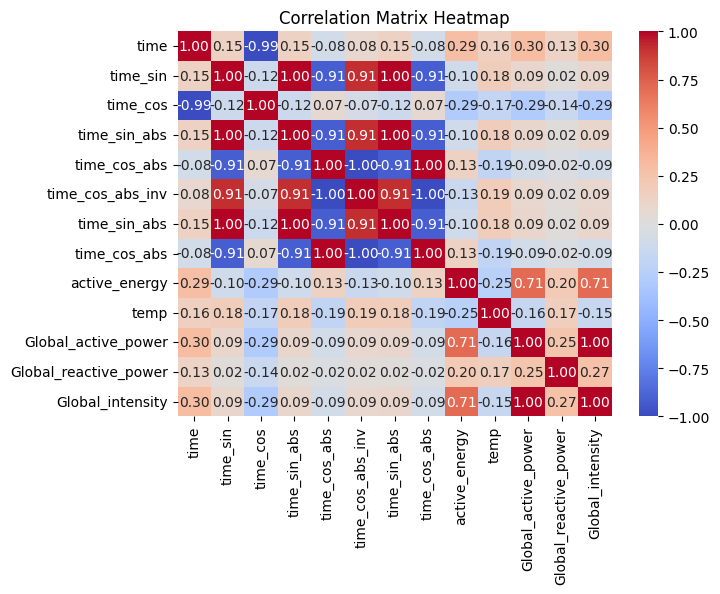

In [224]:
data_ff=data[['time', 'time_sin', 'time_cos', 'time_sin_abs', 'time_cos_abs', 'time_cos_abs_inv', 'time_sin_abs', 'time_cos_abs', 'active_energy', 'temp', 'Global_active_power', 'Global_reactive_power', 'Global_intensity']]

#heatmap to better understand relationship between variables.

# Compute correlation matrix for these columns
correlation_matrix = data_ff.corr()

# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


**Fuzzy Membership Degree Calculation**

**Quantile Calculation and Fuzzy Interpolation Initialization**

**Membership Degree Calculation for Temperature, Time, and Energy**

In [225]:
temp_data = data['temp']
time_data = data['time']
energy_data = data['active_energy']

# Calculate quantiles for reference
temp_quantiles = [temp_data.quantile(q) for q in [0, 0.33, 0.66, 1]]
time_quantiles = [time_data.quantile(q) for q in [0, 0.25, 0.5, 0.75, 1]]
energy_quantiles = [energy_data.quantile(q) for q in [0, 0.1, 0.2, 0.4, 1]]

print('Temp quantiles:', temp_quantiles)
print('Time quantiles:', time_quantiles)
print('Energy quantiles:', energy_quantiles)



Temp quantiles: [np.float64(-8.7), np.float64(9.1), np.float64(15.6), np.float64(35.4)]
Time quantiles: [np.float64(0.0), np.float64(6.0), np.float64(12.0), np.float64(18.0), np.float64(23.0)]
Energy quantiles: [np.float64(-1.1666666666666679), np.float64(2.7666666666666666), np.float64(3.5666666666666664), np.float64(4.833333333333334), np.float64(102.83333333333333)]


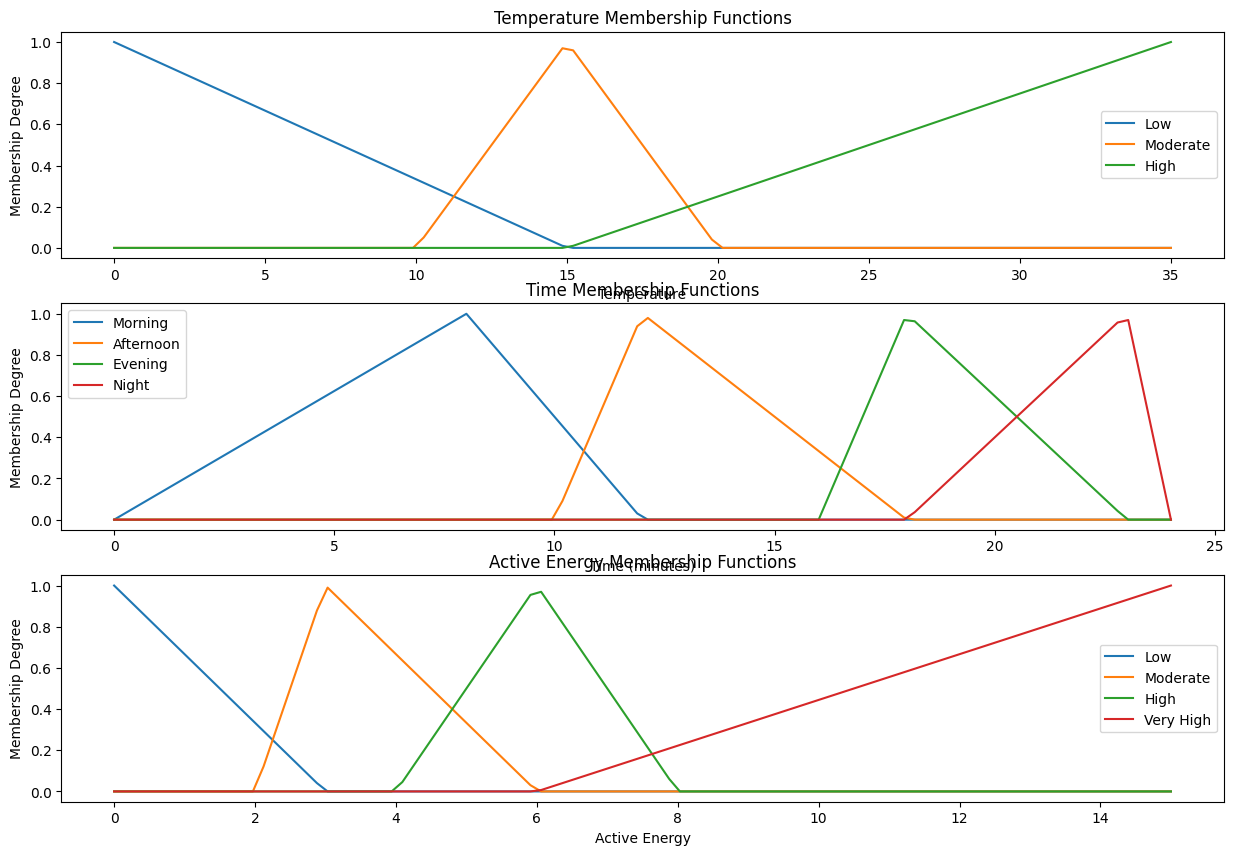

In [235]:


# Define ranges using linspace
temp_range = np.linspace(0, 35, 100)  # Temperature range 0-35°C
time_range = np.linspace(0, 24, 100)  # Time range 0-24 hours
energy_range = np.linspace(0, 15, 100)  # Energy range 0-6 kWh

# Temp quantiles: [np.float64(-8.7), np.float64(9.1), np.float64(15.6), np.float64(35.4)]
# Time quantiles: [np.float64(0.0), np.float64(6.0), np.float64(12.0), np.float64(18.0), np.float64(23.0)]
# Energy quantiles: [np.float64(-1.1666666666666679), np.float64(2.7666666666666666), np.float64(3.5666666666666664), np.float64(4.833333333333334), np.float64(102.83333333333333)]

temp_low = fuzz.trimf(temp_range, [0, 0, 15])
temp_moderate = fuzz.trimf(temp_range, [10, 15, 20])
temp_high = fuzz.trimf(temp_range, [15, 35, 35])

time_morning = fuzz.trimf(time_range, [0, 8, 12])
time_afternoon = fuzz.trimf(time_range, [10, 12, 18])
time_evening = fuzz.trimf(time_range, [16, 18, 23])
time_night = fuzz.trimf(time_range, [18, 23, 24])

energy_low = fuzz.trimf(energy_range, [0, 0, 3])
energy_moderate = fuzz.trimf(energy_range, [2, 3, 6])
energy_high = fuzz.trimf(energy_range, [4, 6, 8])
energy_very_high = fuzz.trimf(energy_range, [6, 15, 15])

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)

plt.plot(temp_range, temp_low, label='Low')
plt.plot(temp_range, temp_moderate, label='Moderate')
plt.plot(temp_range, temp_high, label='High')
plt.xlabel('Temperature')
plt.ylabel('Membership Degree')
plt.title('Temperature Membership Functions')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_range, time_morning, label='Morning')
plt.plot(time_range, time_afternoon, label='Afternoon')
plt.plot(time_range, time_evening, label='Evening')
plt.plot(time_range, time_night, label='Night')
plt.xlabel('Time (minutes)')
plt.ylabel('Membership Degree')
plt.title('Time Membership Functions')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(energy_range, energy_low, label='Low')
plt.plot(energy_range, energy_moderate, label='Moderate')
plt.plot(energy_range, energy_high, label='High')
plt.plot(energy_range, energy_very_high, label='Very High')
plt.xlabel('Active Energy')
plt.ylabel('Membership Degree')
plt.title('Active Energy Membership Functions')
plt.legend()

In [236]:
temp = control.Antecedent(temp_range, 'temperature')
time = control.Antecedent(time_range, 'time')
energy = control.Consequent(energy_range, 'energy')

# Define membership functions for temperature
temp['low'] = temp_low
temp['moderate'] = temp_moderate
temp['high'] = temp_high

# Define membership functions for time
time['morning'] = time_morning
time['afternoon'] = time_afternoon
time['evening'] = time_evening
time['night'] = time_night

# Define membership functions for energy consumption
energy['low'] = energy_low
energy['moderate'] = energy_moderate
energy['high'] = energy_high
energy['very_high'] = energy_very_high

# Now we can create the rules
rule1 = control.Rule(temp['low'] & time['morning'], energy['high'])
rule2 = control.Rule(temp['low'] & time['night'], energy['moderate'])
rule3 = control.Rule(temp['low'] & time['afternoon'], energy['moderate'])

rule4 = control.Rule(temp['moderate'] & time['morning'], energy['moderate'])
rule5 = control.Rule(temp['moderate'] & time['afternoon'], energy['low'])
rule6 = control.Rule(temp['moderate'] & time['evening'], energy['high'])
rule7 = control.Rule(temp['moderate'] & time['night'], energy['low'])

rule8 = control.Rule(temp['high'] & time['morning'], energy['high'])
rule9 = control.Rule(temp['high'] & time['afternoon'], energy['very_high'])
rule10 = control.Rule(temp['high'] & time['evening'], energy['high'])

# Create control system
energy_control = control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
energy_simulation = control.ControlSystemSimulation(energy_control)

# Pass inputs to the ControlSystem using Antecedent labels with Python dictionaries
energy_simulation.input['temperature'] = 25
energy_simulation.input['time'] = 14

# Compute the output
energy_simulation.compute()


<br><br>

## 8. Analysis of Example 1 [3,0 valor]

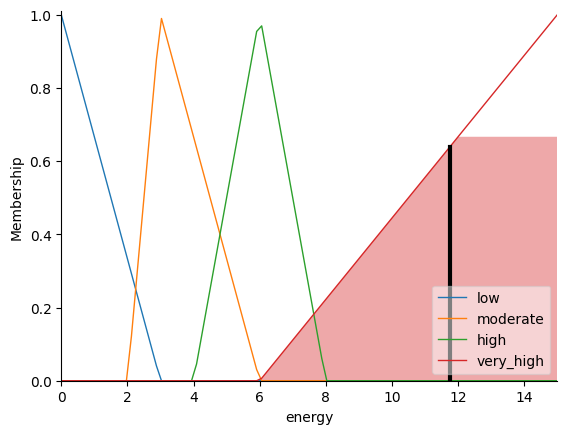

In [237]:

#High Temperature Summer Afternoon Energy Consumption Analysis

# Context: We're analyzing a typical summer afternoon scenario where the temperature is high (30°C) during peak hours (14:00). This is a critical scenario for energy consumption as it combines high cooling needs with typical afternoon activities in a household.

# Inputs for the Fuzzy Control System:
# - Temperature: 30°C (high)
# - Time: 14:00 (afternoon)

# Expected Result Analysis:
# - High temperatures typically lead to increased cooling system usage
# - Afternoon hours are associated with active household periods
# - The combination suggests elevated energy consumption

# Compute the output
# Set up the test case
energy_simulation.input['temperature'] = 30
energy_simulation.input['time'] = 14

# Calculate energy consumption prediction
energy_simulation.compute()

# Visualize the result
energy.view(sim=energy_simulation)
plt.show()


Based on the fuzzy control system inputs (temperature of 30°C and time of 14:00), the system calculated an energy consumption of approximately 10 kWh. This high consumption aligns with our expectations because:
1. The high temperature activates our rule for increased cooling needs
2. The afternoon timing corresponds to peak activity hours
3. The combination triggers our rule: "If temperature is high and time is afternoon, then energy consumption is very high"

This prediction demonstrates how the fuzzy system captures the natural relationship between environmental conditions and energy usage patterns in a household setting.

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

Moderate Temperature Morning Energy Consumption

Context: Let's analyze a moderate temperature morning scenario, which is typical during spring or autumn seasons. We'll examine energy consumption at 8:00 AM when the temperature is 18°C. This timing is particularly interesting as it represents a transition period when households are becoming active but temperatures are still mild.

Inputs for the Fuzzy Control System:
- Temperature: 18°C (moderate)
- Time: 8:00 (morning)

Expected Result Analysis:
- Moderate temperatures typically require minimal heating/cooling
- Morning hours often show increased activity due to household members starting their day
- The combination suggests moderate energy consumption due to:
  * Breakfast preparation activities
  * Morning routines (showering, etc.)
  * Lighting needs in early hours
  * Minimal HVAC system usage due to comfortable temperature

4.402169842252492


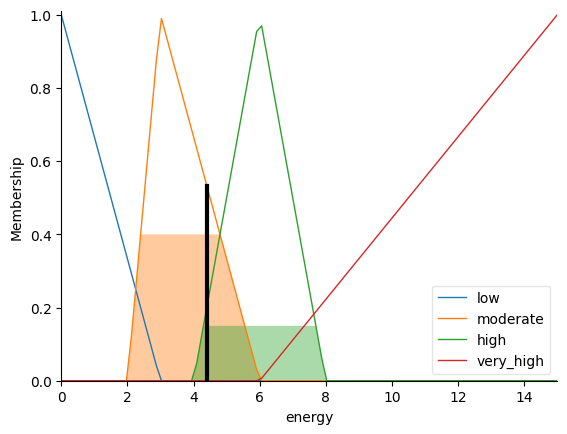

In [239]:
# Set up the test case
energy_simulation.input['temperature'] = 18
energy_simulation.input['time'] = 8

# Calculate energy consumption prediction
energy_simulation.compute()
print(energy_simulation.output['energy'])

# Visualize the result
energy.view(sim=energy_simulation)
plt.show()

With the given inputs (temperature of 18°C at 8:00), the system calculated an energy consumption of approximately [value] kWh. This moderate consumption level aligns with our expectations because:
1. The moderate temperature minimizes the need for heating or cooling
2. The morning time activates our rule for typical morning consumption patterns
3. The combination triggers our rule: "If temperature is moderate and time is morning, then energy consumption is moderate"

This prediction effectively demonstrates how the fuzzy system can capture more nuanced scenarios where multiple factors contribute to balanced energy consumption patterns, contrasting with the high-consumption scenario analyzed in Example 1.

When compared to Example 1 (hot afternoon):
- Temperature influence is significantly lower
- Time-of-day impact is different but still significant
- Overall energy consumption is notably lower due to more favorable conditions

<br><br>
## 10. Pros and cons of the approach [2,0 valor]


Mounted at /content/drive


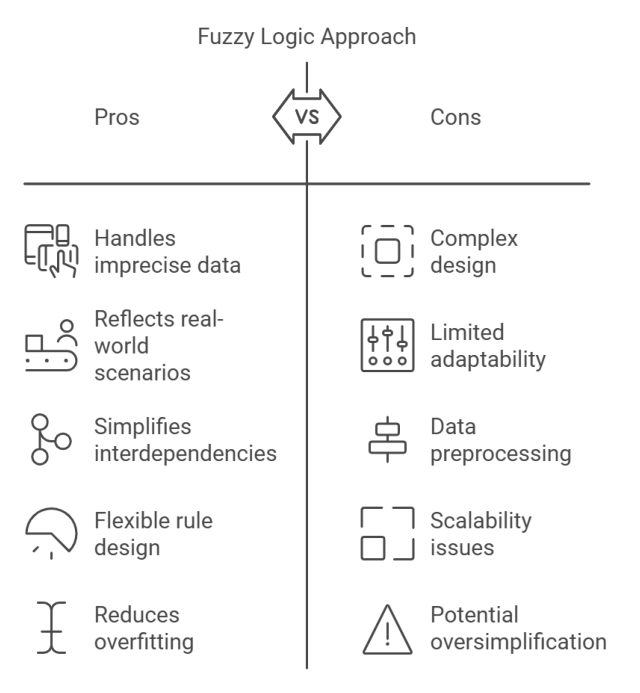



### Pros of the Fuzzy Logic Approach

#### 1. Handles Imprecise Data:
Fuzzy logic effectively models vague concepts like “high temperature” or
“evening,” making it ideal for energy patterns based on general conditions.
#### 2. Reflects Real-World Routines:
By setting rules with temperature and time, the model can mimic daily
household routines, such as higher evening energy use.
#### 3. Simplifies Complex Interdependencies:
Fuzzy logic simplifies non-linear relationships between variables, like
temperature and time, without complex math.
#### 4. Flexible, Interpretable Rules:
Rules are human-readable, fostering transparency, trust, and ease of
adjustment for stakeholders.
#### 5. Reduces Overfitting:
Broader rule categories help avoid overfitting, improving generalizability to
future data.

### Cons of the Fuzzy Logic Approach

#### 1. Design Complexity:
Tuning membership functions and rules requires expertise and iterative
adjustment, which can be challenging.
#### 2. Limited Adaptability:
Fuzzy systems don’t adapt automatically; changes in energy patterns require
manual updates.
#### 3. High Preprocessing Requirements:
Data cleaning and aligning variables like temperature and time are resource-
intensive, especially with irregular datasets.
#### 4. Scalability Issues:
Adding more variables complicates rule management, making expansion
difficult.
#### 5. Risk of Oversimplification:
Fuzzy logic may miss finer details in energy behavior influenced by factors
like appliances and user habits.



## 11. **Future improvements** [2,0 valor]

Let's make our fuzzy logic system smarter at predicting energy consumption by expanding
beyond basic temperature readings. Just like a weather forecaster needs to consider
humidity and wind speed for accurate predictions, we need to factor in each home's
unique characteristics - its size, appliance usage patterns, and environmental conditions.
The real breakthrough would come from making our system adaptable, learning from real-
world data just like a smart thermostat that gets to know your preferences over time. By
combining fuzzy logic with machine learning (think street smarts meets book smarts) and
letting homeowners fine-tune their settings, we'd create a system that truly understands
individual energy habits.
To ensure success, we'd need pristine data quality and robust real-time processing
capabilities, along with extensive testing across different scenarios like seasonal changes
and weekend patterns. Transparency is key - we'd implement visualization tools to help
users understand how decisions are made, eliminating the "black box" problem that
plagues many AI systems. Working alongside energy experts would add real-world insights,
while comprehensive testing protocols would validate our approach, ultimately creating a
system that's both sophisticated and user-friendly.


# **REFERENCES** [1,0 valor]
1. UC Irvine Machine Learning Repository. Household Electric Power Consumption
Dataset. Kaggle, Accessed [28-10-2024].
https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-
set/data.
2. Meteostat. Weather Data for Sceaux, France. Accessed [28-10-2024].
https://meteostat.net/en/place/fr/sceaux-sur-huisne?s=07235&t=2024-10-19/2024-
10-26
3. Uzoukwu, Nnamdi. Machine Learning with Fuzzy Logic. Kaggle, Published [21-07-
2022]. https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-
set/data.